<a href="https://colab.research.google.com/drive/1Sqr-AnEkVWx2wGh4IjBT6XRuVwBLfizM" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### Loading model

In [1]:
!git clone https://github.com/ak112/TSAI-EVA8.0.git
!mv /content/TSAI-EVA8.0/06_AdvancedConvolution/*.py .

fatal: destination path 'TSAI-EVA8.0' already exists and is not an empty directory.
mv: cannot stat '/content/TSAI-EVA8.0/06_AdvancedConvolution/*.py': No such file or directory


### Loading Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import *
from main import *
from dataloader import *
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
%matplotlib inline 

### Loading Data

CUDA availability ? True
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


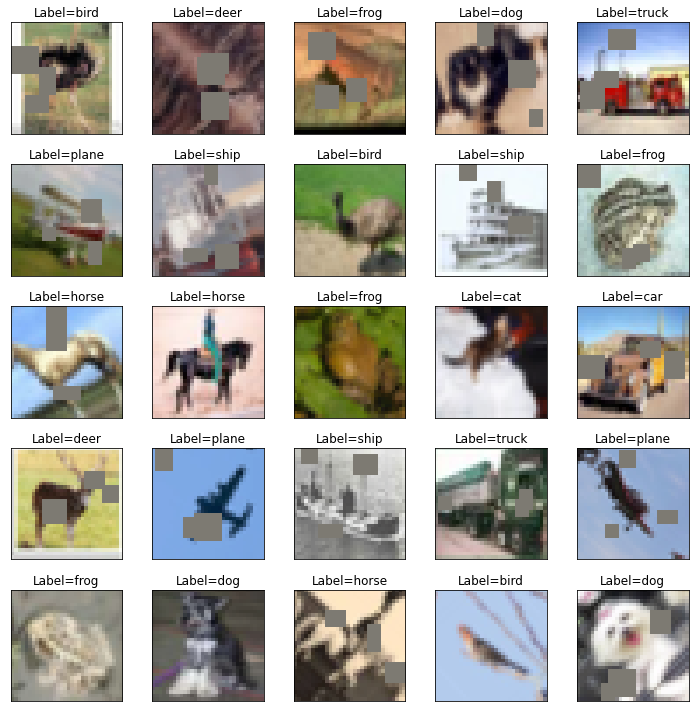

In [3]:
# Loading Training and Test dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

# Plotting images
cifar10.sample_pictures(train_flag=True)

### Loading Model and Params

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Cifar10Net().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           9,600
              ReLU-2          [-1, 128, 32, 32]               0
       BatchNorm2d-3          [-1, 128, 32, 32]             256
           Dropout-4          [-1, 128, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          73,728
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]          18,432
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0

### Training and Testing

In [5]:
# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

train = train()
test = test()

EPOCHS= 150

for epoch in range(EPOCHS):
  print("EPOCH:", epoch)
  train.execute(model, device, trainloader, optimizer, criterion, epoch)
  #scheduler.step()
  test.execute(model, device, testloader, criterion)

EPOCH: 0


Epoch: 0,Loss=1.90 Batch_id=390 Accuracy=23.62: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]


Test set: Average loss: 0.0137, Accuracy: 3362/10000 (33.62%)

EPOCH: 1


Epoch: 1,Loss=1.66 Batch_id=390 Accuracy=35.74: 100%|██████████| 391/391 [00:27<00:00, 14.09it/s]


Test set: Average loss: 0.0121, Accuracy: 4297/10000 (42.97%)

EPOCH: 2


Epoch: 2,Loss=1.70 Batch_id=390 Accuracy=40.91: 100%|██████████| 391/391 [00:26<00:00, 14.86it/s]


Test set: Average loss: 0.0112, Accuracy: 4815/10000 (48.15%)

EPOCH: 3


Epoch: 3,Loss=1.62 Batch_id=390 Accuracy=44.05: 100%|██████████| 391/391 [00:27<00:00, 14.44it/s]


Test set: Average loss: 0.0106, Accuracy: 5096/10000 (50.96%)

EPOCH: 4


Epoch: 4,Loss=1.44 Batch_id=390 Accuracy=46.79: 100%|██████████| 391/391 [00:26<00:00, 14.70it/s]


Test set: Average loss: 0.0102, Accuracy: 5230/10000 (52.30%)

EPOCH: 5


Epoch: 5,Loss=1.45 Batch_id=390 Accuracy=49.10: 100%|██████████| 391/391 [00:26<00:00, 14.61it/s]


Test set: Average loss: 0.0097, Accuracy: 5640/10000 (56.40%)

EPOCH: 6


Epoch: 6,Loss=1.22 Batch_id=390 Accuracy=50.67: 100%|██████████| 391/391 [00:26<00:00, 14.59it/s]


Test set: Average loss: 0.0101, Accuracy: 5467/10000 (54.67%)

EPOCH: 7


Epoch: 7,Loss=1.29 Batch_id=390 Accuracy=52.10: 100%|██████████| 391/391 [00:26<00:00, 14.54it/s]


Test set: Average loss: 0.0094, Accuracy: 5780/10000 (57.80%)

EPOCH: 8


Epoch: 8,Loss=1.25 Batch_id=390 Accuracy=53.33: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0088, Accuracy: 5964/10000 (59.64%)

EPOCH: 9


Epoch: 9,Loss=1.33 Batch_id=390 Accuracy=54.64: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 0.0087, Accuracy: 6090/10000 (60.90%)

EPOCH: 10


Epoch: 10,Loss=1.22 Batch_id=390 Accuracy=55.28: 100%|██████████| 391/391 [00:27<00:00, 14.44it/s]


Test set: Average loss: 0.0084, Accuracy: 6190/10000 (61.90%)

EPOCH: 11


Epoch: 11,Loss=1.54 Batch_id=390 Accuracy=56.02: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]


Test set: Average loss: 0.0085, Accuracy: 6207/10000 (62.07%)

EPOCH: 12


Epoch: 12,Loss=1.16 Batch_id=390 Accuracy=56.90: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]


Test set: Average loss: 0.0081, Accuracy: 6310/10000 (63.10%)

EPOCH: 13


Epoch: 13,Loss=0.86 Batch_id=390 Accuracy=57.73: 100%|██████████| 391/391 [00:26<00:00, 14.58it/s]


Test set: Average loss: 0.0079, Accuracy: 6417/10000 (64.17%)

EPOCH: 14


Epoch: 14,Loss=1.11 Batch_id=390 Accuracy=58.29: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]


Test set: Average loss: 0.0079, Accuracy: 6408/10000 (64.08%)

EPOCH: 15


Epoch: 15,Loss=1.07 Batch_id=390 Accuracy=59.23: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]


Test set: Average loss: 0.0075, Accuracy: 6642/10000 (66.42%)

EPOCH: 16


Epoch: 16,Loss=1.18 Batch_id=390 Accuracy=59.72: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]


Test set: Average loss: 0.0074, Accuracy: 6643/10000 (66.43%)

EPOCH: 17


Epoch: 17,Loss=1.10 Batch_id=390 Accuracy=60.61: 100%|██████████| 391/391 [00:27<00:00, 14.41it/s]


Test set: Average loss: 0.0071, Accuracy: 6785/10000 (67.85%)

EPOCH: 18


Epoch: 18,Loss=1.38 Batch_id=390 Accuracy=60.82: 100%|██████████| 391/391 [00:28<00:00, 13.78it/s]


Test set: Average loss: 0.0072, Accuracy: 6774/10000 (67.74%)

EPOCH: 19


Epoch: 19,Loss=1.06 Batch_id=390 Accuracy=61.28: 100%|██████████| 391/391 [00:27<00:00, 14.45it/s]


Test set: Average loss: 0.0071, Accuracy: 6840/10000 (68.40%)

EPOCH: 20


Epoch: 20,Loss=1.07 Batch_id=390 Accuracy=62.06: 100%|██████████| 391/391 [00:27<00:00, 14.21it/s]


Test set: Average loss: 0.0068, Accuracy: 6974/10000 (69.74%)

EPOCH: 21


Epoch: 21,Loss=1.10 Batch_id=390 Accuracy=62.67: 100%|██████████| 391/391 [00:27<00:00, 14.45it/s]


Test set: Average loss: 0.0070, Accuracy: 6901/10000 (69.01%)

EPOCH: 22


Epoch: 22,Loss=1.27 Batch_id=390 Accuracy=62.95: 100%|██████████| 391/391 [00:27<00:00, 14.48it/s]


Test set: Average loss: 0.0070, Accuracy: 6845/10000 (68.45%)

EPOCH: 23


Epoch: 23,Loss=1.09 Batch_id=390 Accuracy=62.93: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]


Test set: Average loss: 0.0065, Accuracy: 7068/10000 (70.68%)

EPOCH: 24


Epoch: 24,Loss=1.01 Batch_id=390 Accuracy=63.68: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]


Test set: Average loss: 0.0065, Accuracy: 7068/10000 (70.68%)

EPOCH: 25


Epoch: 25,Loss=0.97 Batch_id=390 Accuracy=63.85: 100%|██████████| 391/391 [00:27<00:00, 14.41it/s]


Test set: Average loss: 0.0065, Accuracy: 7043/10000 (70.43%)

EPOCH: 26


Epoch: 26,Loss=1.10 Batch_id=390 Accuracy=64.40: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 0.0064, Accuracy: 7108/10000 (71.08%)

EPOCH: 27


Epoch: 27,Loss=1.01 Batch_id=390 Accuracy=64.89: 100%|██████████| 391/391 [00:27<00:00, 14.46it/s]


Test set: Average loss: 0.0062, Accuracy: 7242/10000 (72.42%)

EPOCH: 28


Epoch: 28,Loss=1.11 Batch_id=390 Accuracy=65.65: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0064, Accuracy: 7067/10000 (70.67%)

EPOCH: 29


Epoch: 29,Loss=1.19 Batch_id=390 Accuracy=65.78: 100%|██████████| 391/391 [00:27<00:00, 14.44it/s]


Test set: Average loss: 0.0060, Accuracy: 7265/10000 (72.65%)

EPOCH: 30


Epoch: 30,Loss=0.91 Batch_id=390 Accuracy=65.97: 100%|██████████| 391/391 [00:27<00:00, 14.35it/s]


Test set: Average loss: 0.0061, Accuracy: 7227/10000 (72.27%)

EPOCH: 31


Epoch: 31,Loss=1.16 Batch_id=390 Accuracy=66.19: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0061, Accuracy: 7295/10000 (72.95%)

EPOCH: 32


Epoch: 32,Loss=0.85 Batch_id=390 Accuracy=66.55: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]


Test set: Average loss: 0.0058, Accuracy: 7378/10000 (73.78%)

EPOCH: 33


Epoch: 33,Loss=0.96 Batch_id=390 Accuracy=66.91: 100%|██████████| 391/391 [00:27<00:00, 14.41it/s]


Test set: Average loss: 0.0058, Accuracy: 7437/10000 (74.37%)

EPOCH: 34


Epoch: 34,Loss=0.81 Batch_id=390 Accuracy=67.41: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]


Test set: Average loss: 0.0056, Accuracy: 7501/10000 (75.01%)

EPOCH: 35


Epoch: 35,Loss=0.75 Batch_id=390 Accuracy=67.38: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0058, Accuracy: 7390/10000 (73.90%)

EPOCH: 36


Epoch: 36,Loss=1.11 Batch_id=390 Accuracy=67.61: 100%|██████████| 391/391 [00:27<00:00, 14.48it/s]


Test set: Average loss: 0.0056, Accuracy: 7514/10000 (75.14%)

EPOCH: 37


Epoch: 37,Loss=1.07 Batch_id=390 Accuracy=67.85: 100%|██████████| 391/391 [00:27<00:00, 14.39it/s]


Test set: Average loss: 0.0057, Accuracy: 7485/10000 (74.85%)

EPOCH: 38


Epoch: 38,Loss=0.86 Batch_id=390 Accuracy=68.79: 100%|██████████| 391/391 [00:26<00:00, 14.54it/s]


Test set: Average loss: 0.0055, Accuracy: 7548/10000 (75.48%)

EPOCH: 39


Epoch: 39,Loss=0.76 Batch_id=390 Accuracy=68.43: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]


Test set: Average loss: 0.0054, Accuracy: 7534/10000 (75.34%)

EPOCH: 40


Epoch: 40,Loss=0.89 Batch_id=390 Accuracy=68.91: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]


Test set: Average loss: 0.0054, Accuracy: 7655/10000 (76.55%)

EPOCH: 41


Epoch: 41,Loss=0.65 Batch_id=390 Accuracy=69.07: 100%|██████████| 391/391 [00:27<00:00, 14.47it/s]


Test set: Average loss: 0.0054, Accuracy: 7640/10000 (76.40%)

EPOCH: 42


Epoch: 42,Loss=0.95 Batch_id=390 Accuracy=69.04: 100%|██████████| 391/391 [00:27<00:00, 14.48it/s]


Test set: Average loss: 0.0052, Accuracy: 7671/10000 (76.71%)

EPOCH: 43


Epoch: 43,Loss=0.95 Batch_id=390 Accuracy=69.56: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]


Test set: Average loss: 0.0053, Accuracy: 7694/10000 (76.94%)

EPOCH: 44


Epoch: 44,Loss=0.98 Batch_id=390 Accuracy=69.64: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]


Test set: Average loss: 0.0052, Accuracy: 7678/10000 (76.78%)

EPOCH: 45


Epoch: 45,Loss=0.81 Batch_id=390 Accuracy=69.94: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]


Test set: Average loss: 0.0054, Accuracy: 7622/10000 (76.22%)

EPOCH: 46


Epoch: 46,Loss=0.91 Batch_id=390 Accuracy=70.03: 100%|██████████| 391/391 [00:26<00:00, 14.51it/s]


Test set: Average loss: 0.0054, Accuracy: 7641/10000 (76.41%)

EPOCH: 47


Epoch: 47,Loss=1.01 Batch_id=390 Accuracy=69.97: 100%|██████████| 391/391 [00:27<00:00, 14.45it/s]


Test set: Average loss: 0.0053, Accuracy: 7666/10000 (76.66%)

EPOCH: 48


Epoch: 48,Loss=0.80 Batch_id=390 Accuracy=70.50: 100%|██████████| 391/391 [00:26<00:00, 14.56it/s]


Test set: Average loss: 0.0050, Accuracy: 7778/10000 (77.78%)

EPOCH: 49


Epoch: 49,Loss=0.90 Batch_id=390 Accuracy=70.68: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]


Test set: Average loss: 0.0051, Accuracy: 7749/10000 (77.49%)

EPOCH: 50


Epoch: 50,Loss=0.93 Batch_id=390 Accuracy=70.83: 100%|██████████| 391/391 [00:27<00:00, 14.29it/s]


Test set: Average loss: 0.0050, Accuracy: 7826/10000 (78.26%)

EPOCH: 51


Epoch: 51,Loss=1.02 Batch_id=390 Accuracy=70.92: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s]


Test set: Average loss: 0.0051, Accuracy: 7750/10000 (77.50%)

EPOCH: 52


Epoch: 52,Loss=0.82 Batch_id=390 Accuracy=71.37: 100%|██████████| 391/391 [00:27<00:00, 14.41it/s]


Test set: Average loss: 0.0050, Accuracy: 7817/10000 (78.17%)

EPOCH: 53


Epoch: 53,Loss=0.85 Batch_id=390 Accuracy=71.22: 100%|██████████| 391/391 [00:26<00:00, 14.52it/s]


Test set: Average loss: 0.0049, Accuracy: 7867/10000 (78.67%)

EPOCH: 54


Epoch: 54,Loss=0.84 Batch_id=390 Accuracy=71.55: 100%|██████████| 391/391 [00:27<00:00, 14.36it/s]


Test set: Average loss: 0.0051, Accuracy: 7754/10000 (77.54%)

EPOCH: 55


Epoch: 55,Loss=0.78 Batch_id=390 Accuracy=71.41: 100%|██████████| 391/391 [00:27<00:00, 14.34it/s]


Test set: Average loss: 0.0052, Accuracy: 7721/10000 (77.21%)

EPOCH: 56


Epoch: 56,Loss=0.81 Batch_id=390 Accuracy=71.27: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]


Test set: Average loss: 0.0049, Accuracy: 7826/10000 (78.26%)

EPOCH: 57


Epoch: 57,Loss=0.73 Batch_id=390 Accuracy=72.07: 100%|██████████| 391/391 [00:27<00:00, 14.38it/s]


Test set: Average loss: 0.0048, Accuracy: 7882/10000 (78.82%)

EPOCH: 58


Epoch: 58,Loss=0.70 Batch_id=390 Accuracy=71.78: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]


Test set: Average loss: 0.0047, Accuracy: 7914/10000 (79.14%)

EPOCH: 59


Epoch: 59,Loss=0.64 Batch_id=390 Accuracy=72.17: 100%|██████████| 391/391 [00:27<00:00, 14.45it/s]


Test set: Average loss: 0.0048, Accuracy: 7871/10000 (78.71%)

EPOCH: 60


Epoch: 60,Loss=0.74 Batch_id=390 Accuracy=72.38: 100%|██████████| 391/391 [00:28<00:00, 13.76it/s]


Test set: Average loss: 0.0048, Accuracy: 7925/10000 (79.25%)

EPOCH: 61


Epoch: 61,Loss=0.61 Batch_id=390 Accuracy=72.38: 100%|██████████| 391/391 [00:27<00:00, 14.35it/s]


Test set: Average loss: 0.0048, Accuracy: 7884/10000 (78.84%)

EPOCH: 62


Epoch: 62,Loss=0.66 Batch_id=390 Accuracy=72.53: 100%|██████████| 391/391 [00:27<00:00, 14.28it/s]


Test set: Average loss: 0.0047, Accuracy: 7944/10000 (79.44%)

EPOCH: 63


Epoch: 63,Loss=0.81 Batch_id=390 Accuracy=72.57: 100%|██████████| 391/391 [00:27<00:00, 14.35it/s]


Test set: Average loss: 0.0046, Accuracy: 7937/10000 (79.37%)

EPOCH: 64


Epoch: 64,Loss=0.85 Batch_id=390 Accuracy=72.48: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]


Test set: Average loss: 0.0046, Accuracy: 7953/10000 (79.53%)

EPOCH: 65


Epoch: 65,Loss=0.57 Batch_id=390 Accuracy=72.62: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0045, Accuracy: 8002/10000 (80.02%)

EPOCH: 66


Epoch: 66,Loss=0.58 Batch_id=390 Accuracy=72.95: 100%|██████████| 391/391 [00:27<00:00, 14.28it/s]


Test set: Average loss: 0.0045, Accuracy: 8025/10000 (80.25%)

EPOCH: 67


Epoch: 67,Loss=0.66 Batch_id=390 Accuracy=73.02: 100%|██████████| 391/391 [00:26<00:00, 14.49it/s]


Test set: Average loss: 0.0044, Accuracy: 7998/10000 (79.98%)

EPOCH: 68


Epoch: 68,Loss=0.80 Batch_id=390 Accuracy=72.94: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]


Test set: Average loss: 0.0047, Accuracy: 7955/10000 (79.55%)

EPOCH: 69


Epoch: 69,Loss=0.82 Batch_id=390 Accuracy=73.40: 100%|██████████| 391/391 [00:27<00:00, 14.37it/s]


Test set: Average loss: 0.0047, Accuracy: 7984/10000 (79.84%)

EPOCH: 70


Epoch: 70,Loss=0.64 Batch_id=390 Accuracy=73.26: 100%|██████████| 391/391 [00:27<00:00, 14.46it/s]


Test set: Average loss: 0.0044, Accuracy: 8065/10000 (80.65%)

EPOCH: 71


Epoch: 71,Loss=0.77 Batch_id=390 Accuracy=73.34: 100%|██████████| 391/391 [00:27<00:00, 14.28it/s]


Test set: Average loss: 0.0045, Accuracy: 8023/10000 (80.23%)

EPOCH: 72


Epoch: 72,Loss=0.77 Batch_id=390 Accuracy=73.95: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]


Test set: Average loss: 0.0044, Accuracy: 8120/10000 (81.20%)

EPOCH: 73


Epoch: 73,Loss=0.81 Batch_id=390 Accuracy=73.44: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0043, Accuracy: 8109/10000 (81.09%)

EPOCH: 74


Epoch: 74,Loss=0.71 Batch_id=390 Accuracy=73.46: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0045, Accuracy: 8049/10000 (80.49%)

EPOCH: 75


Epoch: 75,Loss=0.69 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]


Test set: Average loss: 0.0043, Accuracy: 8139/10000 (81.39%)

EPOCH: 76


Epoch: 76,Loss=0.85 Batch_id=390 Accuracy=73.87: 100%|██████████| 391/391 [00:27<00:00, 14.44it/s]


Test set: Average loss: 0.0043, Accuracy: 8107/10000 (81.07%)

EPOCH: 77


Epoch: 77,Loss=0.82 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [00:28<00:00, 13.84it/s]


Test set: Average loss: 0.0043, Accuracy: 8139/10000 (81.39%)

EPOCH: 78


Epoch: 78,Loss=0.95 Batch_id=390 Accuracy=74.08: 100%|██████████| 391/391 [00:27<00:00, 14.41it/s]


Test set: Average loss: 0.0043, Accuracy: 8104/10000 (81.04%)

EPOCH: 79


Epoch: 79,Loss=0.93 Batch_id=390 Accuracy=74.55: 100%|██████████| 391/391 [00:27<00:00, 14.44it/s]


Test set: Average loss: 0.0044, Accuracy: 8095/10000 (80.95%)

EPOCH: 80


Epoch: 80,Loss=0.92 Batch_id=390 Accuracy=74.16: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]


Test set: Average loss: 0.0042, Accuracy: 8120/10000 (81.20%)

EPOCH: 81


Epoch: 81,Loss=0.55 Batch_id=390 Accuracy=74.44: 100%|██████████| 391/391 [00:27<00:00, 14.42it/s]


Test set: Average loss: 0.0042, Accuracy: 8122/10000 (81.22%)

EPOCH: 82


Epoch: 82,Loss=0.76 Batch_id=390 Accuracy=74.57: 100%|██████████| 391/391 [00:27<00:00, 14.30it/s]


Test set: Average loss: 0.0043, Accuracy: 8106/10000 (81.06%)

EPOCH: 83


Epoch: 83,Loss=0.51 Batch_id=390 Accuracy=74.76: 100%|██████████| 391/391 [00:27<00:00, 14.43it/s]


Test set: Average loss: 0.0042, Accuracy: 8178/10000 (81.78%)

EPOCH: 84


Epoch: 84,Loss=0.59 Batch_id=390 Accuracy=74.92: 100%|██████████| 391/391 [00:26<00:00, 14.50it/s]


Test set: Average loss: 0.0042, Accuracy: 8194/10000 (81.94%)

EPOCH: 85


Epoch: 85,Loss=0.79 Batch_id=390 Accuracy=74.56: 100%|██████████| 391/391 [00:26<00:00, 14.63it/s]


Test set: Average loss: 0.0042, Accuracy: 8173/10000 (81.73%)

EPOCH: 86


Epoch: 86,Loss=0.92 Batch_id=390 Accuracy=74.84: 100%|██████████| 391/391 [00:27<00:00, 14.14it/s]


Test set: Average loss: 0.0041, Accuracy: 8208/10000 (82.08%)

EPOCH: 87


Epoch: 87,Loss=0.71 Batch_id=390 Accuracy=74.77: 100%|██████████| 391/391 [00:26<00:00, 14.53it/s]


Test set: Average loss: 0.0042, Accuracy: 8217/10000 (82.17%)

EPOCH: 88


Epoch: 88,Loss=0.66 Batch_id=390 Accuracy=74.71: 100%|██████████| 391/391 [00:26<00:00, 14.59it/s]


Test set: Average loss: 0.0041, Accuracy: 8231/10000 (82.31%)

EPOCH: 89


Epoch: 89,Loss=0.79 Batch_id=390 Accuracy=75.26: 100%|██████████| 391/391 [00:26<00:00, 14.57it/s]


Test set: Average loss: 0.0041, Accuracy: 8219/10000 (82.19%)

EPOCH: 90


Epoch: 90,Loss=0.81 Batch_id=390 Accuracy=75.03: 100%|██████████| 391/391 [00:26<00:00, 14.52it/s]


Test set: Average loss: 0.0041, Accuracy: 8237/10000 (82.37%)

EPOCH: 91


Epoch: 91,Loss=0.59 Batch_id=390 Accuracy=75.14: 100%|██████████| 391/391 [00:27<00:00, 14.47it/s]


Test set: Average loss: 0.0040, Accuracy: 8238/10000 (82.38%)

EPOCH: 92


Epoch: 92,Loss=0.79 Batch_id=390 Accuracy=75.34: 100%|██████████| 391/391 [00:27<00:00, 14.38it/s]


Test set: Average loss: 0.0041, Accuracy: 8234/10000 (82.34%)

EPOCH: 93


Epoch: 93,Loss=0.76 Batch_id=390 Accuracy=75.00: 100%|██████████| 391/391 [00:27<00:00, 14.35it/s]


Test set: Average loss: 0.0041, Accuracy: 8250/10000 (82.50%)

EPOCH: 94


Epoch: 94,Loss=0.60 Batch_id=390 Accuracy=75.36: 100%|██████████| 391/391 [00:28<00:00, 13.79it/s]


Test set: Average loss: 0.0040, Accuracy: 8301/10000 (83.01%)

EPOCH: 95


Epoch: 95,Loss=0.69 Batch_id=390 Accuracy=75.38: 100%|██████████| 391/391 [00:27<00:00, 14.23it/s]


Test set: Average loss: 0.0041, Accuracy: 8225/10000 (82.25%)

EPOCH: 96


Epoch: 96,Loss=0.99 Batch_id=390 Accuracy=75.45: 100%|██████████| 391/391 [00:27<00:00, 14.28it/s]


Test set: Average loss: 0.0040, Accuracy: 8248/10000 (82.48%)

EPOCH: 97


Epoch: 97,Loss=0.60 Batch_id=390 Accuracy=75.83: 100%|██████████| 391/391 [00:27<00:00, 14.27it/s]


Test set: Average loss: 0.0040, Accuracy: 8259/10000 (82.59%)

EPOCH: 98


Epoch: 98,Loss=0.65 Batch_id=390 Accuracy=75.81: 100%|██████████| 391/391 [00:27<00:00, 14.36it/s]


Test set: Average loss: 0.0040, Accuracy: 8252/10000 (82.52%)

EPOCH: 99


Epoch: 99,Loss=0.74 Batch_id=390 Accuracy=75.70: 100%|██████████| 391/391 [00:27<00:00, 14.38it/s]


Test set: Average loss: 0.0040, Accuracy: 8256/10000 (82.56%)

EPOCH: 100


Epoch: 100,Loss=0.67 Batch_id=390 Accuracy=75.78: 100%|██████████| 391/391 [00:27<00:00, 14.39it/s]


Test set: Average loss: 0.0039, Accuracy: 8289/10000 (82.89%)

EPOCH: 101


Epoch: 101,Loss=0.94 Batch_id=390 Accuracy=75.77: 100%|██████████| 391/391 [00:27<00:00, 14.36it/s]


Test set: Average loss: 0.0040, Accuracy: 8260/10000 (82.60%)

EPOCH: 102


Epoch: 102,Loss=0.45 Batch_id=390 Accuracy=75.85: 100%|██████████| 391/391 [00:27<00:00, 14.25it/s]


Test set: Average loss: 0.0039, Accuracy: 8321/10000 (83.21%)

EPOCH: 103


Epoch: 103,Loss=0.70 Batch_id=390 Accuracy=75.94: 100%|██████████| 391/391 [00:28<00:00, 13.79it/s]


Test set: Average loss: 0.0039, Accuracy: 8281/10000 (82.81%)

EPOCH: 104


Epoch: 104,Loss=0.73 Batch_id=390 Accuracy=76.15: 100%|██████████| 391/391 [00:27<00:00, 14.37it/s]


Test set: Average loss: 0.0040, Accuracy: 8236/10000 (82.36%)

EPOCH: 105


Epoch: 105,Loss=0.81 Batch_id=390 Accuracy=76.17: 100%|██████████| 391/391 [00:27<00:00, 14.29it/s]


Test set: Average loss: 0.0039, Accuracy: 8324/10000 (83.24%)

EPOCH: 106


Epoch: 106,Loss=0.74 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:27<00:00, 14.36it/s]


Test set: Average loss: 0.0039, Accuracy: 8299/10000 (82.99%)

EPOCH: 107


Epoch: 107,Loss=0.67 Batch_id=390 Accuracy=76.42: 100%|██████████| 391/391 [00:26<00:00, 14.60it/s]


Test set: Average loss: 0.0040, Accuracy: 8315/10000 (83.15%)

EPOCH: 108


Epoch: 108,Loss=0.75 Batch_id=390 Accuracy=76.46: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]


Test set: Average loss: 0.0039, Accuracy: 8311/10000 (83.11%)

EPOCH: 109


Epoch: 109,Loss=0.80 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [00:27<00:00, 14.39it/s]


Test set: Average loss: 0.0038, Accuracy: 8366/10000 (83.66%)

EPOCH: 110


Epoch: 110,Loss=0.59 Batch_id=390 Accuracy=76.55: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]


Test set: Average loss: 0.0040, Accuracy: 8287/10000 (82.87%)

EPOCH: 111


Epoch: 111,Loss=0.63 Batch_id=390 Accuracy=76.25: 100%|██████████| 391/391 [00:27<00:00, 14.24it/s]


Test set: Average loss: 0.0038, Accuracy: 8368/10000 (83.68%)

EPOCH: 112


Epoch: 112,Loss=0.60 Batch_id=390 Accuracy=76.71: 100%|██████████| 391/391 [00:28<00:00, 13.48it/s]


Test set: Average loss: 0.0039, Accuracy: 8326/10000 (83.26%)

EPOCH: 113


Epoch: 113,Loss=0.76 Batch_id=390 Accuracy=76.74: 100%|██████████| 391/391 [00:27<00:00, 14.32it/s]


Test set: Average loss: 0.0038, Accuracy: 8360/10000 (83.60%)

EPOCH: 114


Epoch: 114,Loss=0.67 Batch_id=390 Accuracy=76.83: 100%|██████████| 391/391 [00:27<00:00, 14.24it/s]


Test set: Average loss: 0.0039, Accuracy: 8322/10000 (83.22%)

EPOCH: 115


Epoch: 115,Loss=0.61 Batch_id=390 Accuracy=76.85: 100%|██████████| 391/391 [00:27<00:00, 14.29it/s]


Test set: Average loss: 0.0038, Accuracy: 8387/10000 (83.87%)

EPOCH: 116


Epoch: 116,Loss=0.92 Batch_id=390 Accuracy=76.81: 100%|██████████| 391/391 [00:27<00:00, 14.29it/s]


Test set: Average loss: 0.0038, Accuracy: 8350/10000 (83.50%)

EPOCH: 117


Epoch: 117,Loss=0.51 Batch_id=390 Accuracy=76.77: 100%|██████████| 391/391 [00:27<00:00, 14.27it/s]


Test set: Average loss: 0.0038, Accuracy: 8349/10000 (83.49%)

EPOCH: 118


Epoch: 118,Loss=0.63 Batch_id=390 Accuracy=76.88: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]


Test set: Average loss: 0.0038, Accuracy: 8380/10000 (83.80%)

EPOCH: 119


Epoch: 119,Loss=0.61 Batch_id=390 Accuracy=76.87: 100%|██████████| 391/391 [00:27<00:00, 14.23it/s]


Test set: Average loss: 0.0038, Accuracy: 8336/10000 (83.36%)

EPOCH: 120


Epoch: 120,Loss=0.82 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:28<00:00, 13.70it/s]


Test set: Average loss: 0.0038, Accuracy: 8356/10000 (83.56%)

EPOCH: 121


Epoch: 121,Loss=0.75 Batch_id=390 Accuracy=77.11: 100%|██████████| 391/391 [00:27<00:00, 14.14it/s]


Test set: Average loss: 0.0038, Accuracy: 8394/10000 (83.94%)

EPOCH: 122


Epoch: 122,Loss=0.80 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]


Test set: Average loss: 0.0037, Accuracy: 8386/10000 (83.86%)

EPOCH: 123


Epoch: 123,Loss=0.76 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]


Test set: Average loss: 0.0038, Accuracy: 8385/10000 (83.85%)

EPOCH: 124


Epoch: 124,Loss=0.56 Batch_id=390 Accuracy=77.08: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.0037, Accuracy: 8419/10000 (84.19%)

EPOCH: 125


Epoch: 125,Loss=0.69 Batch_id=390 Accuracy=77.17: 100%|██████████| 391/391 [00:27<00:00, 14.13it/s]


Test set: Average loss: 0.0038, Accuracy: 8386/10000 (83.86%)

EPOCH: 126


Epoch: 126,Loss=0.79 Batch_id=390 Accuracy=77.48: 100%|██████████| 391/391 [00:27<00:00, 14.23it/s]


Test set: Average loss: 0.0038, Accuracy: 8377/10000 (83.77%)

EPOCH: 127


Epoch: 127,Loss=0.63 Batch_id=390 Accuracy=77.21: 100%|██████████| 391/391 [00:27<00:00, 14.21it/s]


Test set: Average loss: 0.0038, Accuracy: 8367/10000 (83.67%)

EPOCH: 128


Epoch: 128,Loss=0.45 Batch_id=390 Accuracy=77.31: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]


Test set: Average loss: 0.0037, Accuracy: 8410/10000 (84.10%)

EPOCH: 129


Epoch: 129,Loss=0.78 Batch_id=390 Accuracy=77.39: 100%|██████████| 391/391 [00:28<00:00, 13.66it/s]


Test set: Average loss: 0.0037, Accuracy: 8419/10000 (84.19%)

EPOCH: 130


Epoch: 130,Loss=0.62 Batch_id=390 Accuracy=77.55: 100%|██████████| 391/391 [00:27<00:00, 14.23it/s]


Test set: Average loss: 0.0037, Accuracy: 8379/10000 (83.79%)

EPOCH: 131


Epoch: 131,Loss=0.55 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]


Test set: Average loss: 0.0037, Accuracy: 8393/10000 (83.93%)

EPOCH: 132


Epoch: 132,Loss=0.93 Batch_id=390 Accuracy=77.63: 100%|██████████| 391/391 [00:27<00:00, 14.21it/s]


Test set: Average loss: 0.0038, Accuracy: 8362/10000 (83.62%)

EPOCH: 133


Epoch: 133,Loss=0.67 Batch_id=390 Accuracy=77.61: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]


Test set: Average loss: 0.0036, Accuracy: 8433/10000 (84.33%)

EPOCH: 134


Epoch: 134,Loss=0.70 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]


Test set: Average loss: 0.0036, Accuracy: 8449/10000 (84.49%)

EPOCH: 135


Epoch: 135,Loss=0.76 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s]


Test set: Average loss: 0.0037, Accuracy: 8391/10000 (83.91%)

EPOCH: 136


Epoch: 136,Loss=0.75 Batch_id=390 Accuracy=77.69: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]


Test set: Average loss: 0.0036, Accuracy: 8446/10000 (84.46%)

EPOCH: 137


Epoch: 137,Loss=0.64 Batch_id=390 Accuracy=77.83: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.0036, Accuracy: 8433/10000 (84.33%)

EPOCH: 138


Epoch: 138,Loss=0.64 Batch_id=390 Accuracy=77.73: 100%|██████████| 391/391 [00:28<00:00, 13.70it/s]


Test set: Average loss: 0.0037, Accuracy: 8423/10000 (84.23%)

EPOCH: 139


Epoch: 139,Loss=0.69 Batch_id=390 Accuracy=77.68: 100%|██████████| 391/391 [00:27<00:00, 14.09it/s]


Test set: Average loss: 0.0036, Accuracy: 8463/10000 (84.63%)

EPOCH: 140


Epoch: 140,Loss=0.55 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]


Test set: Average loss: 0.0037, Accuracy: 8434/10000 (84.34%)

EPOCH: 141


Epoch: 141,Loss=0.54 Batch_id=390 Accuracy=77.77: 100%|██████████| 391/391 [00:27<00:00, 14.11it/s]


Test set: Average loss: 0.0036, Accuracy: 8419/10000 (84.19%)

EPOCH: 142


Epoch: 142,Loss=0.57 Batch_id=390 Accuracy=77.95: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]


Test set: Average loss: 0.0036, Accuracy: 8459/10000 (84.59%)

EPOCH: 143


Epoch: 143,Loss=0.52 Batch_id=390 Accuracy=78.10: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.0036, Accuracy: 8460/10000 (84.60%)

EPOCH: 144


Epoch: 144,Loss=0.73 Batch_id=390 Accuracy=77.82: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]


Test set: Average loss: 0.0037, Accuracy: 8424/10000 (84.24%)

EPOCH: 145


Epoch: 145,Loss=0.57 Batch_id=390 Accuracy=77.69: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.0036, Accuracy: 8455/10000 (84.55%)

EPOCH: 146


Epoch: 146,Loss=0.73 Batch_id=390 Accuracy=78.24: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]


Test set: Average loss: 0.0036, Accuracy: 8485/10000 (84.85%)

EPOCH: 147


Epoch: 147,Loss=0.82 Batch_id=390 Accuracy=78.17: 100%|██████████| 391/391 [00:27<00:00, 14.21it/s]


Test set: Average loss: 0.0037, Accuracy: 8452/10000 (84.52%)

EPOCH: 148


Epoch: 148,Loss=1.02 Batch_id=390 Accuracy=78.07: 100%|██████████| 391/391 [00:27<00:00, 14.19it/s]


Test set: Average loss: 0.0036, Accuracy: 8487/10000 (84.87%)

EPOCH: 149


Epoch: 149,Loss=0.65 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:27<00:00, 14.13it/s]


Test set: Average loss: 0.0035, Accuracy: 8494/10000 (84.94%)

